In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from IPython.display import display
from scipy import stats
from datetime import timedelta
from collections import Counter
#from warnings import filterwarnings
#filterwarnings('ignore')

In [2]:
data = pd.read_csv('de_first_orders_q2_17_vs_q2_18.dsv', sep=';', low_memory=False)

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 932457 entries, 0 to 932456
Data columns (total 27 columns):
SCM_N_ORDER_POS_NR              932457 non-null int64
SCM_N_ORDER_NR                  932457 non-null int64
TDT_T_KEY_ORDER_DATE            932457 non-null object
THR_C_KEY_ORDER_HOUR            932457 non-null object
SIT_N_KEY_SITE                  932457 non-null int64
CUS_N_KEY_CUSTOMER              932457 non-null int64
SCM_SALES_BMF                   932457 non-null object
SCM_SALES_CANCEL_BMF            932457 non-null object
SCM_D_FINANCE_CM1               932457 non-null object
SCM_D_FINANCE_CM2               932457 non-null object
SCM_D_ORIG_FINANCE_ORDER_NET    932457 non-null object
SCM_AP_ID                       932457 non-null int64
SCM_AS_ID                       932457 non-null int64
SCM_MASTER_AP_ID                932457 non-null int64
SCM_IS_ZSP_ORDER                932457 non-null int64
SCM_C_ORDER_STATUS              932457 non-null object
CTP_N_KEY_CUSTOME

In [4]:
data['TDT_T_KEY_ORDER_DATE'] = pd.to_datetime(data['TDT_T_KEY_ORDER_DATE'], format="%d/%m/%y")
data['ORDER_DATETIME'] = data['TDT_T_KEY_ORDER_DATE'].astype(str) + ' ' + data['THR_C_KEY_ORDER_HOUR'].astype(str) + ':00'
data['ORDER_DATETIME'] = pd.to_datetime(data['ORDER_DATETIME'], format="%Y/%m/%d %H:%M:%S")

lista = [float(str(i).replace(',','.')) for i in data['SCM_SALES_BMF'].values]
data['SCM_SALES_BMF'] = lista
lista0 = [float(str(i).replace(',','.')) for i in data['SCM_D_ORIG_FINANCE_ORDER_NET'].values]
data['SCM_D_ORIG_FINANCE_ORDER_NET'] = lista0
lista1 = [float(str(i).replace(',','.')) for i in data['SCM_SALES_CANCEL_BMF'].values]
data['SCM_SALES_CANCEL_BMF'] = lista1
lista2 = [float(str(i).replace(',','.')) for i in data['SCM_D_FINANCE_CM1'].values]
data['SCM_D_FINANCE_CM1'] = lista2
lista3 = [float(str(i).replace(',','.')) for i in data['SCM_D_FINANCE_CM2'].values]
data['SCM_D_FINANCE_CM2'] = lista3

#Convert date to calendar week number and month number
data['WEEK_NUMBER'] = data['TDT_T_KEY_ORDER_DATE'].dt.week
data['MONTH_NUMBER'] = data['TDT_T_KEY_ORDER_DATE'].dt.month

#New variables creation
data['FINANCE_ORDER_NET'] = data['SCM_D_ORIG_FINANCE_ORDER_NET'].groupby(data['SCM_N_ORDER_NR']).transform('sum')
data['REL_CM1'] = data['SCM_D_FINANCE_CM1'] / data['FINANCE_ORDER_NET'] * 100
data['REL_CM2'] = data['SCM_D_FINANCE_CM2'] / data['FINANCE_ORDER_NET'] * 10

In [5]:
q2_17 = data[data['TDT_T_KEY_ORDER_DATE'] < '2018-04-01']

In [6]:
q2_17['TDT_T_KEY_ORDER_DATE'].min(), q2_17['TDT_T_KEY_ORDER_DATE'].max()

(Timestamp('2017-04-01 00:00:00'), Timestamp('2017-06-30 00:00:00'))

In [7]:
q2_18 = data[data['TDT_T_KEY_ORDER_DATE'] >= '2018-04-01']

In [8]:
q2_18['TDT_T_KEY_ORDER_DATE'].min(), q2_18['TDT_T_KEY_ORDER_DATE'].max()

(Timestamp('2018-04-01 00:00:00'), Timestamp('2018-06-30 00:00:00'))

In [9]:
# 1st orders per quarter (17 vs 18)

In [10]:
q2_17['SCM_N_ORDER_NR'].nunique()

108852

In [11]:
q2_18['SCM_N_ORDER_NR'].nunique()

111191

In [12]:
allowed_coutries = ['D', 'A', 'CH', 'LU', 'FL']

In [13]:
# All SP sold (17 vs 18)

In [14]:
# Q2 17 SP sold
q2_17[q2_17['SCM_IS_ZSP_ORDER'] == 1]['SCM_N_ORDER_NR'].nunique()

3798

In [15]:
# Q2 17 SP sold in not allowed countries
q2_17[(q2_17['SCM_IS_ZSP_ORDER'] == 1) & (~q2_17['SCM_OCI_LAND'].isin(allowed_coutries))]['SCM_N_ORDER_NR'].nunique()

219

In [16]:
# Q2 18 SP sold
q2_18[q2_18['SCM_IS_ZSP_ORDER'] == 1]['SCM_N_ORDER_NR'].nunique()

5396

In [17]:
# Q2 18 SP sold in not allowed countries
q2_18[(q2_18['SCM_IS_ZSP_ORDER'] == 1) & (~q2_18['SCM_OCI_LAND'].isin(allowed_coutries))]['SCM_N_ORDER_NR'].nunique()

0

In [18]:
# All destinations found per quarter (17 vs 18)

In [19]:
q2_17['SCM_OCI_LAND'].unique()

array(['D', 'A', 'DK', 'CH', 'EE', 'E2', 'F', 'LT', 'I', 'NL', 'LU', 'BE',
       'LV', 'HR', 'PL', 'GB', 'E1', 'SL', 'IE', 'FL', 'CZ'], dtype=object)

In [20]:
q2_18['SCM_OCI_LAND'].unique()

array(['D', 'A', 'NL', 'EE', 'SL', 'IE', 'DK', 'LU', 'I', 'CH', 'BE',
       'LV', 'F', 'E1', 'CZ', 'E2', 'LT', 'GB', 'FL', 'HR', 'PL'],
      dtype=object)

<html><head>


<!-- Load require.js. Delete this if your page already loads require.js -->
<script src="https://cdnjs.cloudflare.com/ajax/libs/require.js/2.3.4/require.min.js" integrity="sha256-Ae2Vz/4ePdIu6ZyI/5ZGsYnb+m0JlOmKPjt6XZ9JJkA=" crossorigin="anonymous"></script>
<script src="https://unpkg.com/@jupyter-widgets/html-manager@*/dist/embed-amd.js" crossorigin="anonymous"></script>
<script type="application/vnd.jupyter.widget-state+json">
{
    "version_major": 2,
    "version_minor": 0,
    "state": {}
}
</script>
</head>
<body>


</body>
</html>
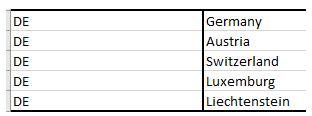

In [21]:
# SCM_OCI_LAND (delivery country), SP sold in 1st orders

In [22]:
# Q2 17
q2_17[q2_17['SCM_IS_ZSP_ORDER'] == 1].groupby('SCM_OCI_LAND')['SCM_N_ORDER_NR'].nunique()

SCM_OCI_LAND
A      491
BE      30
CH      46
D     3016
DK      26
E1       3
E2       3
EE      47
F       19
HR       3
I       41
LT       4
LU      26
LV      24
NL      18
PL       1
Name: SCM_N_ORDER_NR, dtype: int64

In [23]:
# Q2 18
q2_18[q2_18['SCM_IS_ZSP_ORDER'] == 1].groupby('SCM_OCI_LAND')['SCM_N_ORDER_NR'].nunique()

SCM_OCI_LAND
A      787
CH      33
D     4541
LU      35
Name: SCM_N_ORDER_NR, dtype: int64

In [24]:
#Query getting all DE orders in Q2 (17 vs 18) where delivery country is a restriction

In [25]:
# We will locate the SP discount applied to those orders before restrictions in 2017 and not applied in this orders due to DCR.

In [26]:
dcr_sp = pd.read_csv('de_oci_land_sp_q2_17_vs_q2_18.dsv', sep=';', low_memory=False)

In [27]:
def clean_n_format(data):
#Some data formatting
	data['TDT_T_KEY_ORDER_DATE'] = pd.to_datetime(data['TDT_T_KEY_ORDER_DATE'], format="%d/%m/%y")
	data['ORDER_DATETIME'] = data['TDT_T_KEY_ORDER_DATE'].astype(str) + ' ' + data['THR_C_KEY_ORDER_HOUR'].astype(str) + ':00'
	data['ORDER_DATETIME'] = pd.to_datetime(data['ORDER_DATETIME'], format="%Y/%m/%d %H:%M:%S")
	data['CZP_START_DATE'] = pd.to_datetime(data['CZP_START_DATE'], format="%d/%m/%y")
	data['CZP_EXPIRY_DATE'] = pd.to_datetime(data['CZP_EXPIRY_DATE'], format="%d/%m/%y")

	lista = [float(str(i).replace(',','.')) for i in data['SCM_SALES_BMF'].values]
	data['SCM_SALES_BMF'] = lista
	lista0 = [float(str(i).replace(',','.')) for i in data['SCM_D_ORIG_FINANCE_ORDER_NET'].values]
	data['SCM_D_ORIG_FINANCE_ORDER_NET'] = lista0
	lista1 = [float(str(i).replace(',','.')) for i in data['SCM_SALES_CANCEL_BMF'].values]
	data['SCM_SALES_CANCEL_BMF'] = lista1
	lista2 = [float(str(i).replace(',','.')) for i in data['SCM_D_FINANCE_CM1'].values]
	data['SCM_D_FINANCE_CM1'] = lista2
	lista3 = [float(str(i).replace(',','.')) for i in data['SCM_D_FINANCE_CM2'].values]
	data['SCM_D_FINANCE_CM2'] = lista3
	lista4 = [float(str(i).replace(',','.')) for i in data['CZP_PRICE'].values]
	data['CZP_PRICE'] = lista4

	#Convert date to calendar week number and month number
	data['WEEK_NUMBER'] = data['TDT_T_KEY_ORDER_DATE'].dt.week
	data['MONTH_NUMBER'] = data['TDT_T_KEY_ORDER_DATE'].dt.month

	#boolean mask with duplicated orders as True
	dupl_mask = [len(i) > 1 for i in data.groupby('SCM_N_ORDER_NR')['CZP_START_DATE'].unique().values]

	#get duplicated order IDs
	dup_orders = data.groupby('SCM_N_ORDER_NR')['CZP_START_DATE'].unique()[dupl_mask].index.values

	#check if there are customers with one order duplicated more than once... (normally not supossed to be)
	cust_2_dup_orders = data[data['SCM_N_ORDER_NR'].isin(dup_orders)].groupby('CUS_N_KEY_CUSTOMER')['SCM_N_ORDER_NR'].nunique()[\
	data[data['SCM_N_ORDER_NR'].isin(dup_orders)].groupby('CUS_N_KEY_CUSTOMER')['SCM_N_ORDER_NR'].nunique() > 1].index.values

	#Let's get incorrect duplicated indexes instead of order_id to exclude them and select the correct data subset
	dup_indexes = []

	for i in dup_orders:
		o_id = data[data['SCM_N_ORDER_NR'] == i]
		if o_id['CUS_N_KEY_CUSTOMER'].unique() not in cust_2_dup_orders:
			sp_dates = o_id['CZP_START_DATE'].value_counts().index.values
			min_date = o_id[o_id['CZP_START_DATE'] < max(sp_dates)]
			dup_indexes.append(min_date.index.values)

	for c in cust_2_dup_orders:
		#print('Customer', c)
		cust_orders = data[(data['CUS_N_KEY_CUSTOMER'] == c) & (data['SCM_N_ORDER_NR'].isin(dup_orders))]
		if cust_orders['SCM_IS_ZSP_ORDER'].sum() >= 1:
			#print('SP Sold')
			sp_datetime = cust_orders[cust_orders['SCM_MASTER_AP_ID'] == 42225]['ORDER_DATETIME'].unique()[0]
			if (o_id['ORDER_DATETIME'] < sp_datetime).sum() > 0:
				#print('One order before SP')
				before = cust_orders[cust_orders['ORDER_DATETIME'] < sp_datetime]
				sp_dates_b = before['CZP_START_DATE'].value_counts().index.values
				max_date_b = before[before['CZP_START_DATE'] > min(sp_dates)]
				max_dates_b = list(max_date_b.index.values)
				
				after = o_id[o_id['ORDER_DATETIME'] >= sp_datetime]
				sp_dates_a = after['CZP_START_DATE'].value_counts().index.values
				min_date_a = after[after['CZP_START_DATE'] < max(sp_dates)]
				min_dates_a = list(min_date_a.index.values)
				
				indexes_date_not_valid = max_dates_b + min_dates_a
				dup_indexes.append(indexes_date_not_valid)
			elif (o_id['ORDER_DATETIME'] < sp_datetime).sum() == 0:
				#print('One order after SP')
				sp_dates = cust_orders['CZP_START_DATE'].value_counts().index.values
				min_date = cust_orders[cust_orders['CZP_START_DATE'] < max(sp_dates)]
				dup_indexes.append(min_date.index.values)
			else:
				print('Something went wrong')
		elif cust_orders['SCM_IS_ZSP_ORDER'].sum() == 0:
			#print('No SP Sold')
			sp_dates = cust_orders['CZP_START_DATE'].value_counts().index.values
			min_date = cust_orders[cust_orders['CZP_START_DATE'] < max(sp_dates)]
			dup_indexes.append(min_date.index.values)

	#Get a flatten list of indexes
	dupl_ind = [i for lista in dup_indexes for i in lista]
	print('Duplicated rows detected: ', len(dupl_ind))
	print('Start dropping..')
	#Drop duplicated indexes
	data.drop(data.index[dupl_ind], inplace=True)

	#0 printed, in order to be sure there are no orders duplicated remaining...
	print('Number of order IDs having more than one SP_START_DATE now: ', 
          sum(len(i) > 1 for i in data.groupby('SCM_N_ORDER_NR')['CZP_START_DATE'].unique().values))

	#New variables creation
	data['FINANCE_ORDER_NET'] = data['SCM_D_ORIG_FINANCE_ORDER_NET'].groupby(data['SCM_N_ORDER_NR']).transform('sum')
	data['REL_CM1'] = data['SCM_D_FINANCE_CM1'] / data['FINANCE_ORDER_NET'] * 100
	data['REL_CM2'] = data['SCM_D_FINANCE_CM2'] / data['FINANCE_ORDER_NET'] * 100

In [28]:
clean_n_format(dcr_sp)

Duplicated rows detected:  471
Start dropping..
Number of order IDs having more than one SP_START_DATE now:  0


In [29]:
dcr_sp.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 542917 entries, 0 to 543387
Data columns (total 38 columns):
SCM_N_ORDER_POS_NR              542917 non-null int64
SCM_N_ORDER_NR                  542917 non-null int64
TDT_T_KEY_ORDER_DATE            542917 non-null datetime64[ns]
THR_C_KEY_ORDER_HOUR            542917 non-null object
SIT_N_KEY_SITE                  542917 non-null int64
CUS_N_KEY_CUSTOMER              542917 non-null int64
SCM_SALES_BMF                   542917 non-null float64
SCM_SALES_CANCEL_BMF            542917 non-null float64
SCM_D_FINANCE_CM1               542917 non-null float64
SCM_D_FINANCE_CM2               542917 non-null float64
SCM_D_ORIG_FINANCE_ORDER_NET    542917 non-null float64
SCM_AP_ID                       542917 non-null int64
SCM_AS_ID                       542917 non-null int64
SCM_MASTER_AP_ID                542917 non-null int64
SCM_IS_ZSP_ORDER                542917 non-null int64
SCM_C_ORDER_STATUS              542917 non-null object
CTP_

In [30]:
dcr_sp_q2_17 = dcr_sp[dcr_sp['TDT_T_KEY_ORDER_DATE'] < '2018-04-01']

In [31]:
dcr_sp_q2_17['TDT_T_KEY_ORDER_DATE'].min(), dcr_sp_q2_17['TDT_T_KEY_ORDER_DATE'].max()

(Timestamp('2017-04-01 00:00:00'), Timestamp('2017-06-30 00:00:00'))

In [32]:
dcr_sp_q2_18 = dcr_sp[dcr_sp['TDT_T_KEY_ORDER_DATE'] >= '2018-04-01']

In [33]:
dcr_sp_q2_18['TDT_T_KEY_ORDER_DATE'].min(), dcr_sp_q2_18['TDT_T_KEY_ORDER_DATE'].max()

(Timestamp('2018-04-01 00:00:00'), Timestamp('2018-06-30 00:00:00'))

In [34]:
# Orders delivered in not allowed countries Q2 17
dcr_sp_q2_17['SCM_N_ORDER_NR'].nunique()

30770

In [35]:
# Orders delivered in not allowed countries Q2 18
dcr_sp_q2_18['SCM_N_ORDER_NR'].nunique()

24576

In [36]:
# Orders delivered in not allowed countries Q2 18 coming from a SP bought before DCR implementation
dcr_sp_q2_18[dcr_sp_q2_18['CZP_START_DATE'] <= '2018-03-13']['SCM_N_ORDER_NR'].nunique()

10655

In [37]:
# Orders delivered in not allowed countries Q2 18 coming from a SP including DCR feature
dcr_sp_q2_18[dcr_sp_q2_18['CZP_START_DATE'] > '2018-03-13']['SCM_N_ORDER_NR'].nunique()

517

In [38]:
# Orders delivered in not allowed countries Q2 18 w/o SP
dcr_sp_q2_18[dcr_sp_q2_18['CZP_START_DATE'].isnull()]['SCM_N_ORDER_NR'].nunique()

13404

In [39]:
# Different destinations in Q2 17
dcr_sp_q2_17['SCM_OCI_LAND'].unique()

array(['DK', 'E2', 'F', 'NL', 'BE', 'EE', 'I', 'LV', 'IE', 'CZ', 'GB',
       'LT', 'E1', 'SL', 'HR', 'PL'], dtype=object)

In [40]:
# Different destinations in Q2 18
dcr_sp_q2_18['SCM_OCI_LAND'].unique()

array(['BE', 'SL', 'F', 'DK', 'EE', 'I', 'GB', 'NL', 'LT', 'E1', 'E2',
       'LV', 'HR', 'IE', 'PL', 'CZ'], dtype=object)

In [41]:
# SP sold within those orders in Q2 17
dcr_sp_q2_17[dcr_sp_q2_17['SCM_IS_ZSP_ORDER'] == 1]['SCM_N_ORDER_NR'].nunique()

1649

In [42]:
# SP sold within those orders in Q2 18 (0 should be the expected value)
dcr_sp_q2_18[dcr_sp_q2_18['SCM_IS_ZSP_ORDER'] == 1]['SCM_N_ORDER_NR'].nunique()

123

In [43]:
# At least SP not bought in 1st order...probably related with renewals or similar?
dcr_sp_q2_18[dcr_sp_q2_18['SCM_IS_ZSP_ORDER'] == 1]['OSP_KO_COUNT_NET'].unique()

array([ 13,  19,  35,  41,  28,  26,  33,   4,  38,  39,  82,  15,  29,
       127,  44,  67,  49,  48,  40,  56,  14,  17,  11,  53,  18,  71,
        12,  20,   8,  36, 111,  51, 181,   9,  16,  32,  37,  90,  31,
       119,  94, 132, 439, 110,   5,  47,  61, 125, 174,  24,  59,  30,
        80, 104, 108,  27,  58,  84,  21,  62, 120,  69,  10,   7,   6,
        23, 149,  64, 102,  74, 106,  75,  87], dtype=int64)

In [44]:
# How SP sold are spreaded within the delivery countries...
dcr_sp_q2_18[dcr_sp_q2_18['SCM_IS_ZSP_ORDER'] == 1].groupby('SCM_OCI_LAND')['SCM_N_ORDER_NR'].nunique()

SCM_OCI_LAND
BE    29
DK    26
E1     5
E2     7
EE     5
F      1
HR     1
I     39
IE     1
LT     3
LV     1
NL     2
SL     3
Name: SCM_N_ORDER_NR, dtype: int64

In [45]:
# Verify calculations using the Master_AP_ID for the SP Article...exactly matching
dcr_sp_q2_18[dcr_sp_q2_18['SCM_MASTER_AP_ID'] == 42225].groupby('SCM_OCI_LAND')['SCM_N_ORDER_NR'].nunique()

SCM_OCI_LAND
BE    29
DK    26
E1     5
E2     7
EE     5
F      1
HR     1
I     39
IE     1
LT     3
LV     1
NL     2
SL     3
Name: SCM_N_ORDER_NR, dtype: int64

In [46]:
# Q2 17. Orders with SP discount
dcr_sp_q2_17[dcr_sp_q2_17['SCM_MASTER_AP_ID'] == 42715]['SCM_N_ORDER_NR'].nunique()

15805

In [47]:
# Amount discounted Q2 17
dcr_sp_q2_17[dcr_sp_q2_17['SCM_MASTER_AP_ID'] == 42715]['SCM_SALES_BMF'].sum()

-164315.52

In [48]:
# Q2 18. Orders with SP discount
dcr_sp_q2_18[dcr_sp_q2_18['SCM_MASTER_AP_ID'] == 42715]['SCM_N_ORDER_NR'].nunique()

10474

In [49]:
# Amount discounted Q2 18
dcr_sp_q2_18[dcr_sp_q2_18['SCM_MASTER_AP_ID'] == 42715]['SCM_SALES_BMF'].sum()

-96279.33

In [50]:
dcr_sp_q2_18[(dcr_sp_q2_18['SCM_MASTER_AP_ID'] == 42225) & (dcr_sp_q2_18['CZP_START_DATE'] > '2018-03-13')]['SCM_N_ORDER_NR'].nunique()

46

In [51]:
dcr_sp_q2_18[(dcr_sp_q2_18['SCM_MASTER_AP_ID'] == 42225) & (dcr_sp_q2_18['CZP_START_DATE'] > '2018-03-13')]

,SCM_N_ORDER_POS_NR,SCM_N_ORDER_NR,TDT_T_KEY_ORDER_DATE,THR_C_KEY_ORDER_HOUR,SIT_N_KEY_SITE,CUS_N_KEY_CUSTOMER,SCM_SALES_BMF,SCM_SALES_CANCEL_BMF,SCM_D_FINANCE_CM1,SCM_D_FINANCE_CM2,...,CZP_EXPIRY_DATE,CZP_ZTQ_ID,CZP_PERCENTAGE,CZP_PRICE,ORDER_DATETIME,WEEK_NUMBER,MONTH_NUMBER,FINANCE_ORDER_NET,REL_CM1,REL_CM2
312717,459828220,107817012,2018-04-01,17:30,1,13114822,9.99,0.00,8.2562,8.2562,...,2021-04-01,52.0,5.0,9.99,2018-04-01 17:30:00,13,4,42.1075,19.607433,19.607433
313832,460195902,107902725,2018-04-02,21:42,1,13722079,9.99,0.00,7.9920,7.9920,...,2021-04-02,52.0,5.0,9.99,2018-04-02 21:42:00,14,4,220.6960,3.621271,3.621271
316015,459717149,107791520,2018-04-01,06:42,1,6965250,4.99,0.00,3.9920,3.9920,...,2019-04-06,51.0,5.0,4.99,2018-04-01 06:42:00,13,4,135.9520,2.936330,2.936330
316104,460045695,107867507,2018-04-02,14:59,1,4646540,9.99,0.00,8.1885,8.1885,...,2021-04-02,52.0,5.0,9.99,2018-04-02 14:59:00,14,4,351.3378,2.330663,2.330663
317390,460557242,107993322,2018-04-03,21:54,1,7276456,4.99,0.00,4.0902,4.0902,...,2019-05-07,51.0,5.0,4.99,2018-04-03 21:54:00,14,4,167.1557,2.446940,2.446940
323394,461849149,108319850,2018-04-09,07:54,1,6635539,9.99,0.00,8.2562,8.2562,...,2021-04-09,52.0,5.0,9.99,2018-04-09 07:54:00,15,4,58.9422,14.007282,14.007282
323932,461943070,108344587,2018-04-09,12:48,1,7170292,17.99,14.87,14.8678,14.8678,...,2018-05-23,54.0,7.0,17.99,2018-04-09 12:48:00,15,4,69.7769,21.307625,21.307625
326179,461437277,108217587,2018-04-07,10:56,1,16718310,9.99,0.00,8.2562,8.2562,...,2021-04-07,52.0,5.0,9.99,2018-04-07 10:56:00,14,4,94.1238,8.771639,8.771639
332941,461000212,108105951,2018-04-05,12:29,1,11394524,7.99,0.00,6.5492,6.5492,...,2019-04-05,53.0,7.0,7.99,2018-04-05 12:29:00,14,4,195.1311,3.356308,3.356308
338732,460703361,108030432,2018-04-04,12:45,1,8669737,7.99,0.00,6.3920,6.3920,...,2019-05-04,53.0,7.0,7.99,2018-04-04 12:45:00,14,4,187.0960,3.416428,3.416428


In [52]:
dcr_sp_q2_18[(dcr_sp_q2_18['SCM_MASTER_AP_ID'] == 42225) &
             (dcr_sp_q2_18['CZP_START_DATE'] > '2018-03-13')].to_csv('sp_sold_in_dcr_orders.csv', 
            sep=';', index=False, encoding='utf-8')

In [53]:
# Orders having a SP bought after the DCR implementation applying the discount (discount should not be applying)
dcr_sp_q2_18[(dcr_sp_q2_18['SCM_MASTER_AP_ID'] == 42715) & (dcr_sp_q2_18['CZP_START_DATE'] > '2018-03-13')]['SCM_N_ORDER_NR'].nunique()

13

In [54]:
dcr_sp_q2_18[(dcr_sp_q2_18['SCM_MASTER_AP_ID'] == 42715) & (dcr_sp_q2_18['CZP_START_DATE'] > '2018-03-13')][dcr_sp_q2_18.columns[:20]]

,SCM_N_ORDER_POS_NR,SCM_N_ORDER_NR,TDT_T_KEY_ORDER_DATE,THR_C_KEY_ORDER_HOUR,SIT_N_KEY_SITE,CUS_N_KEY_CUSTOMER,SCM_SALES_BMF,SCM_SALES_CANCEL_BMF,SCM_D_FINANCE_CM1,SCM_D_FINANCE_CM2,SCM_D_ORIG_FINANCE_ORDER_NET,SCM_AP_ID,SCM_AS_ID,SCM_MASTER_AP_ID,SCM_IS_ZSP_ORDER,SCM_C_ORDER_STATUS,CTP_N_KEY_CUSTOMER_TYPE,SCM_OCI_LAND,SCM_D_FC_ID,SCM_D_PC_DSP
325663,461453099,108221688,2018-04-07,12:10,1,19462723,-6.71,0.0,-5.5000,-5.5000,-5.5000,0,6,42715,0,L,0,I,0,0
328436,461074620,108124744,2018-04-05,17:18,1,19706275,-23.69,0.0,-18.9520,-18.9520,-18.9520,0,6,42715,0,L,0,HR,0,0
339647,462972326,108600981,2018-04-12,17:49,1,8815537,-11.90,0.0,-9.8347,-9.8347,-9.8347,0,6,42715,0,L,0,BE,0,0
347416,462436151,108469204,2018-04-10,21:32,1,6662671,-3.56,0.0,-3.2963,-3.2963,-3.2963,0,6,42715,0,L,0,PL,0,0
359125,464078728,108875786,2018-04-17,00:05,1,8968899,-1.78,0.0,-1.4590,-1.4590,-1.4590,0,6,42715,0,L,0,I,0,0
383948,466217627,109390659,2018-04-25,07:30,1,7275054,-6.25,0.0,-5.1653,-5.1653,-5.1653,0,6,42715,1,L,0,BE,0,0
388286,468547814,109579680,2018-04-27,22:19,1,11326234,-15.81,0.0,-13.0661,-13.0661,-13.0661,0,6,42715,0,L,0,BE,0,0
398911,468177111,109906981,2018-05-02,21:05,1,6175474,-4.80,0.0,-3.9669,-3.9669,-3.9669,0,6,42715,0,L,0,BE,0,0
470120,474741546,111548496,2018-05-28,15:04,1,6317107,-3.00,0.0,-2.4000,-2.4000,-2.4000,0,6,42715,0,L,0,HR,0,0
513325,480471886,112995765,2018-06-18,10:42,1,6812780,-3.05,0.0,-2.5000,-2.5000,-2.5000,0,6,42715,0,L,0,I,0,0


In [55]:
dcr_sp_q2_18[(dcr_sp_q2_18['SCM_MASTER_AP_ID'] == 42715) &
             (dcr_sp_q2_18['CZP_START_DATE'] > '2018-03-13')].to_csv('orders_from_sp_sold_after_dcr_implementation_including_discount.csv', 
            sep=';', index=False, encoding='utf-8')

In [56]:
# Money not supossed to be spent
dcr_sp_q2_18[(dcr_sp_q2_18['SCM_MASTER_AP_ID'] == 42715) & (dcr_sp_q2_18['CZP_START_DATE'] > '2018-03-13')]['SCM_SALES_BMF'].sum()

-101.53

In [57]:
# Orders having an old SP bought before the DCR implementation applying the discount
dcr_sp_q2_18[(dcr_sp_q2_18['SCM_MASTER_AP_ID'] == 42715) & (dcr_sp_q2_18['CZP_START_DATE'] <= '2018-03-13')]['SCM_N_ORDER_NR'].nunique()

10448

In [58]:
# Discount spent in orders having an old SP bought before the DCR implementation
dcr_sp_q2_18[(dcr_sp_q2_18['SCM_MASTER_AP_ID'] == 42715) & (dcr_sp_q2_18['CZP_START_DATE'] <= '2018-03-13')]['SCM_SALES_BMF'].sum()

-96078.05000000002

In [59]:
# Orders with SP discount and no SP seems to be active (BUG)
dcr_sp_q2_18[(dcr_sp_q2_18['SCM_MASTER_AP_ID'] == 42715) & (dcr_sp_q2_18['CZP_START_DATE'].isnull())]['SCM_N_ORDER_NR'].nunique()

13

In [60]:
dcr_sp_q2_18[(dcr_sp_q2_18['SCM_MASTER_AP_ID'] == 42715) & (dcr_sp_q2_18['CZP_START_DATE'].isnull())][dcr_sp_q2_18.columns[:20]]

,SCM_N_ORDER_POS_NR,SCM_N_ORDER_NR,TDT_T_KEY_ORDER_DATE,THR_C_KEY_ORDER_HOUR,SIT_N_KEY_SITE,CUS_N_KEY_CUSTOMER,SCM_SALES_BMF,SCM_SALES_CANCEL_BMF,SCM_D_FINANCE_CM1,SCM_D_FINANCE_CM2,SCM_D_ORIG_FINANCE_ORDER_NET,SCM_AP_ID,SCM_AS_ID,SCM_MASTER_AP_ID,SCM_IS_ZSP_ORDER,SCM_C_ORDER_STATUS,CTP_N_KEY_CUSTOMER_TYPE,SCM_OCI_LAND,SCM_D_FC_ID,SCM_D_PC_DSP
329320,461252075,108170011,2018-04-06,11:32,1,7140892,-2.50,0.0,-2.0000,-2.0000,-2.0000,0,6,42715,0,L,0,DK,0,0
353246,462657995,108523834,2018-04-11,17:11,1,5621569,-29.05,0.0,-25.1461,-25.1461,-25.1461,0,6,42715,0,L,0,E1,0,0
379657,465290665,109179574,2018-04-22,12:08,1,13943099,-2.07,0.0,-1.7250,-1.7250,-1.7250,0,6,42715,0,L,0,EE,0,0
407716,468733956,110048695,2018-05-05,07:54,1,1301271,-1.97,0.0,-1.6281,-1.6281,-1.6281,0,6,42715,0,L,0,BE,0,0
434083,471322566,110700500,2018-05-15,10:36,1,8674356,-8.20,0.0,-6.7213,-6.7213,-6.7213,0,6,42715,0,L,0,I,0,0
495599,477351933,112204641,2018-06-06,12:15,1,19216051,-3.00,0.0,-2.5065,-2.5065,-2.5065,0,6,42715,0,L,0,E1,0,0
512509,480522839,113009418,2018-06-18,13:18,1,16850559,-1.33,0.0,-1.1083,-1.1083,-1.1083,0,6,42715,0,L,0,EE,0,0
516834,480795393,113078804,2018-06-19,11:00,1,10397216,-2.40,0.0,-2.0000,-2.0000,-2.0000,0,6,42715,0,L,0,EE,0,0
524075,481632761,113284732,2018-06-22,09:24,1,16856365,-0.50,0.0,-0.4132,-0.4132,-0.4132,0,6,42715,0,L,0,LV,0,0
525310,481131397,113162761,2018-06-20,12:47,1,18418264,-38.13,0.0,-34.6636,-34.6636,-34.6636,0,6,42715,0,L,0,E2,0,0


In [61]:
dcr_sp_q2_18[(dcr_sp_q2_18['SCM_MASTER_AP_ID'] == 42715) 
             & (dcr_sp_q2_18['CZP_START_DATE'].isnull())].to_csv('orders_with_sp_discount_and_no_sp_active.csv', 
            sep=';', index=False, encoding='utf-8')

In [62]:
dcr_sp_q2_18[(dcr_sp_q2_18['SCM_MASTER_AP_ID'] == 42715) & (dcr_sp_q2_18['CZP_START_DATE'].isnull())]['SCM_SALES_BMF'].sum()

-99.75

In [63]:
# Orders having a SP bought after the DCR implementation
dcr_sp_q2_18[dcr_sp_q2_18['CZP_START_DATE'] > '2018-03-13']['SCM_N_ORDER_NR'].nunique()

517

In [64]:
# Orders having a SP bought after the DCR implementation with discount appearing in them
wrong_orders = dcr_sp_q2_18[(dcr_sp_q2_18['SCM_MASTER_AP_ID'] == 42715) & (dcr_sp_q2_18['CZP_START_DATE'] > '2018-03-13')]['SCM_N_ORDER_NR'].values

In [65]:
len(wrong_orders)

13

In [66]:
# Orders having a SP bought after the DCR implementation without any SP discount
dcr_sp_q2_18[(dcr_sp_q2_18['CZP_START_DATE'] > '2018-03-13') & (~dcr_sp_q2_18['SCM_N_ORDER_NR'].isin(wrong_orders))]['SCM_N_ORDER_NR'].nunique()

504

In [67]:
# Sales coming from these orders
dcr_sp_q2_18[(dcr_sp_q2_18['CZP_START_DATE'] > '2018-03-13') & (~dcr_sp_q2_18['SCM_N_ORDER_NR'].isin(wrong_orders))]['SCM_SALES_BMF'].sum()

62060.821

In [68]:
# Money saved due to DCR (apply for each order the % discount for the current SP)
(dcr_sp_q2_18[(dcr_sp_q2_18['CZP_START_DATE'] > '2018-03-13') &
             (~dcr_sp_q2_18['SCM_N_ORDER_NR'].isin(wrong_orders))].groupby('SCM_N_ORDER_NR')['SCM_SALES_BMF'].sum() *\
dcr_sp_q2_18[(dcr_sp_q2_18['CZP_START_DATE'] > '2018-03-13') &
             (~dcr_sp_q2_18['SCM_N_ORDER_NR'].isin(wrong_orders))].groupby('SCM_N_ORDER_NR')['CZP_PERCENTAGE'].mean() / 100).sum()

2980.7008619999997